### Student Information
Name:周駿傑

Student ID:114164518

GitHub ID:143371193+Ha1ion@users.noreply.github.com

URL : https://github.com/Ha1ion/DM2025-Lab1-Exercise

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Workflow Overview:
Step 1: Load and Clean Data

Step 2: Exploratory Data Analysis (EDA)

Step 3: Create Document-Term Matrix

Step 4: Term Frequency Visualization (Long-tail distribution)

Step 5: Dimensionality Reduction and Interactive Visualization

Prepare Data (Step 1) → High-level Observation (Step 2) → Data Quantification (Step 3) → In-depth Analysis (Steps 4 & 5)

## Step 0: Environment Setup and Library Imports

In [15]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import math
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import plotly.express as px

# Setting font for Chinese characters (optional, can be removed if not needed)
try:
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['axes.unicode_minus'] = False
except Exception as e:
    print(f"Warning: Failed to set Chinese font. Error: {e}")

# Download and set stopwords
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

print("Environment and libraries are ready.")
print("-" * 50)

Environment and libraries are ready.
--------------------------------------------------


## Step 1: Load, Clean, and Prepare the New Dataset

In [16]:
print("Step 1: Loading and Cleaning Data...")

# Load the dataset
try:
    df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
    print("Successfully loaded 'Reddit-stock-sentiment.csv'")
except FileNotFoundError:
    print("Error: 'newdataset/Reddit-stock-sentiment.csv' not found. Please check the file path.")
    exit()

# Select necessary columns and rename them
df = df[['text', 'label']].copy()
df.rename(columns={'Text': 'text', 'Label': 'label'}, inplace=True)

# Handle missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Add a readable category name column
label_map = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}
df['category_name'] = df['label'].map(label_map)

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove non-alphabetic characters
    text = text.lower() # Convert to lowercase
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

print(f"Data cleaning complete. Remaining records: {len(df)}")
print("Dataset Preview:")
print(df.head())
print("-" * 50)

Step 1: Loading and Cleaning Data...
Successfully loaded 'Reddit-stock-sentiment.csv'
Data cleaning complete. Remaining records: 824
Dataset Preview:
                                                text  label category_name  \
0                                   Calls on retards   -1.0      Negative   
1  Stunt as in like why did they even make a big ...    0.0       Neutral   
2                  Seeing lots of red in the ticker.    0.0       Neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0      Positive   
4                           He didn’t say thank you.   -1.0      Negative   

                                        cleaned_text  
0                                   calls on retards  
1  stunt as in like why did they even make a big ...  
2                   seeing lots of red in the ticker  
3  vision marine technologies inc is rewriting th...  
4                             he didnt say thank you  
--------------------------------------------------


## Step 1.1: Data Sampling

In [17]:
print("Step 1.1: Performing Data Sampling...")

# Set sampling rate, e.g., 50%
sampling_rate = 0.5
df_sampled = df.sample(frac=sampling_rate, random_state=42)

print(f"Original data count: {len(df)}")
print(f"Sampled data count ({sampling_rate*100}%): {len(df_sampled)}")
print("Data sampling complete. Subsequent steps will use the sampled dataset.")
print("-" * 50)

# Overwrite the original DataFrame with the sampled one for convenience
df = df_sampled.copy()

Step 1.1: Performing Data Sampling...
Original data count: 824
Sampled data count (50.0%): 412
Data sampling complete. Subsequent steps will use the sampled dataset.
--------------------------------------------------


## Step 2: Exploratory Data Analysis (EDA) - New Visualizations

Step 2: Performing Exploratory Data Analysis...


C:\Users\user\AppData\Local\Temp\ipykernel_13644\1161591766.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




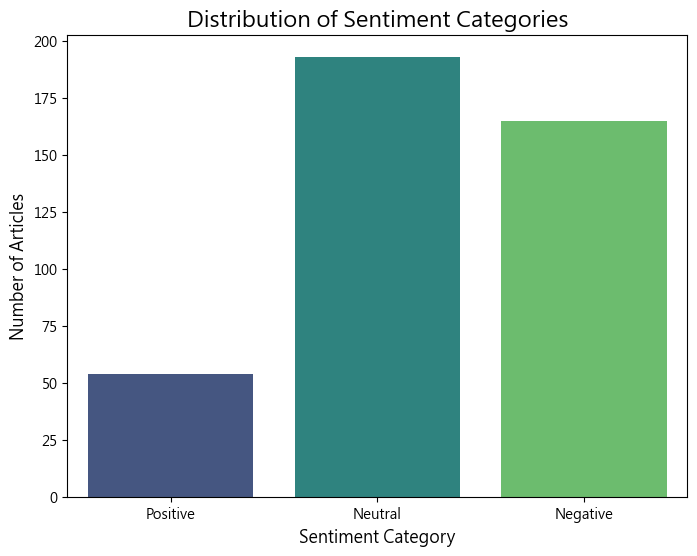

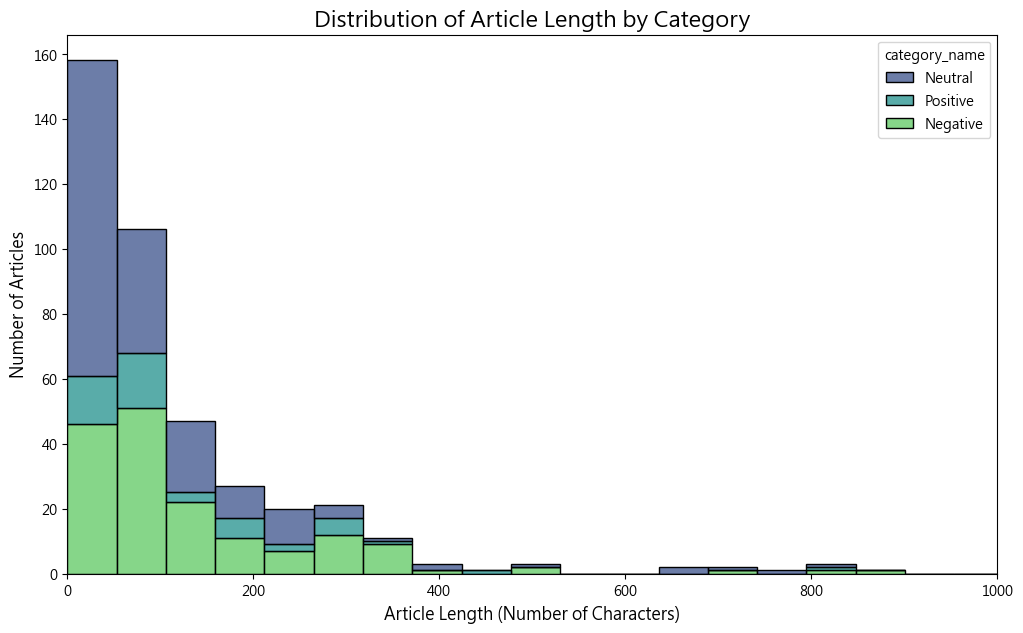

--------------------------------------------------


In [18]:
print("Step 2: Performing Exploratory Data Analysis...")

# Visualization 1: Distribution of article categories
plt.figure(figsize=(8, 6))
sns.countplot(x='category_name', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Distribution of Sentiment Categories', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.show()

# Visualization 2: Distribution of article lengths by category
df['text_length'] = df['cleaned_text'].str.len()
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='text_length', hue='category_name', multiple='stack', bins=50, palette='viridis')
plt.title('Distribution of Article Length by Category', fontsize=16)
plt.xlabel('Article Length (Number of Characters)', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xlim(0, 1000) 
plt.show()
print("-" * 50)

 ## Exercises 1-8 have been included in the process above.

* **Exercise 1 (Print the first three records):**

* **Exercises 2 & 3 (Pandas querying techniques):**

* **Exercises 4 & 5 (Handling missing values):**

* **Exercises 6, 7, 8 (Data sampling and comparison):**

* **Exercise 9 (Using an analyzer to analyze a single record):**

## Step 3: Create Document-Term Matrix (exercise9-13)

In [19]:
print("Step 3: Creating Document-Term Matrix...")

# Use CountVectorizer for feature engineering
# Filter out terms with extreme frequencies
vectorizer = CountVectorizer(
    stop_words=list(STOPWORDS),
    min_df=10,        # A term must appear in at least 10 documents
    max_df=0.7,       # A term must not appear in more than 70% of documents
    ngram_range=(1, 1) # Consider only single words
)

X_counts = vectorizer.fit_transform(df['cleaned_text'])
terms = vectorizer.get_feature_names_out()

print(f"Filtered vocabulary size: {len(terms)} terms")
print(f"Document-Term Matrix shape: {X_counts.shape}")
print("-" * 50)

Step 3: Creating Document-Term Matrix...
Filtered vocabulary size: 55 terms
Document-Term Matrix shape: (412, 55)
--------------------------------------------------


## Step 4: Term Frequency Visualization (exercise 14-15)

Step 4: Visualizing Term Frequencies...


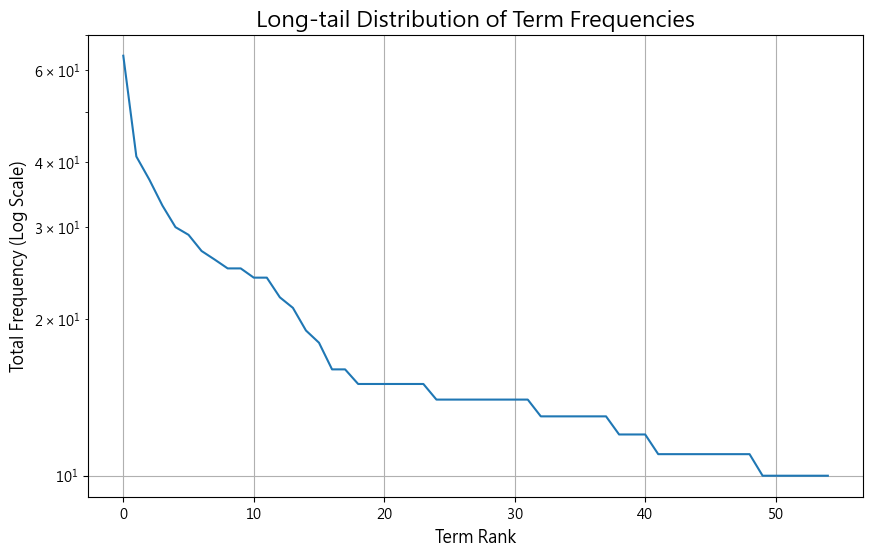

In [20]:
print("Step 4: Visualizing Term Frequencies...")

term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
freq_df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})
sorted_freq_df = freq_df.sort_values(by='frequency', ascending=False)

# Visualization: Long-tail distribution curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_freq_df)), sorted_freq_df['frequency'])
plt.yscale('log')
plt.title('Long-tail Distribution of Term Frequencies', fontsize=16)
plt.xlabel('Term Rank', fontsize=12)
plt.ylabel('Total Frequency (Log Scale)', fontsize=12)
plt.grid(True)
plt.show()

## Step 5: Dimensionality Reduction and Interactive Visualization (exercise 11-12)

Step 5: UMAP Dimensionality Reduction and Plotly Visualization...


C:\nthu\2025_DM_Lab1\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



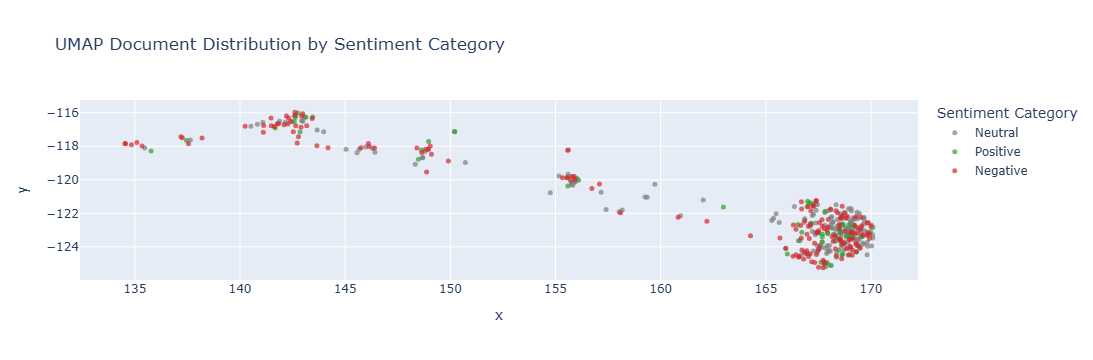

--------------------------------------------------


In [21]:
print("Step 5: UMAP Dimensionality Reduction and Plotly Visualization...")

reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=20, min_dist=0.2)
embedding = reducer.fit_transform(X_counts)

plot_df = pd.DataFrame(embedding, columns=['x', 'y'])
df.reset_index(drop=True, inplace=True)
plot_df = pd.concat([plot_df, df[['category_name', 'text']]], axis=1)
plot_df['text_preview'] = plot_df['text'].str[:100] + '...'

fig = px.scatter(
    plot_df,
    x='x',
    y='y',
    color='category_name',
    hover_data={'text_preview': True, 'x': False, 'y': False},
    title='UMAP Document Distribution by Sentiment Category',
    color_discrete_map={'Positive': '#2ca02c', 'Neutral': '#7f7f7f', 'Negative': '#d62728'}
)
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(legend_title_text='Sentiment Category')
fig.show()
print("-" * 50)

## Additional New Visualization
### Chart 1 : Common Phrase (Bigram) Analysis
Chart Interpretation:
The chart generated by this code allows you to clearly see which "phrases" or "terms" are most frequently mentioned in these Reddit posts. This provides richer insights into understanding the community's popular slang, discussion topics, and emotional expressions than single words alone can offer.

Additional Visualization: Analyzing the most common consecutive word pairs (Bigrams)...


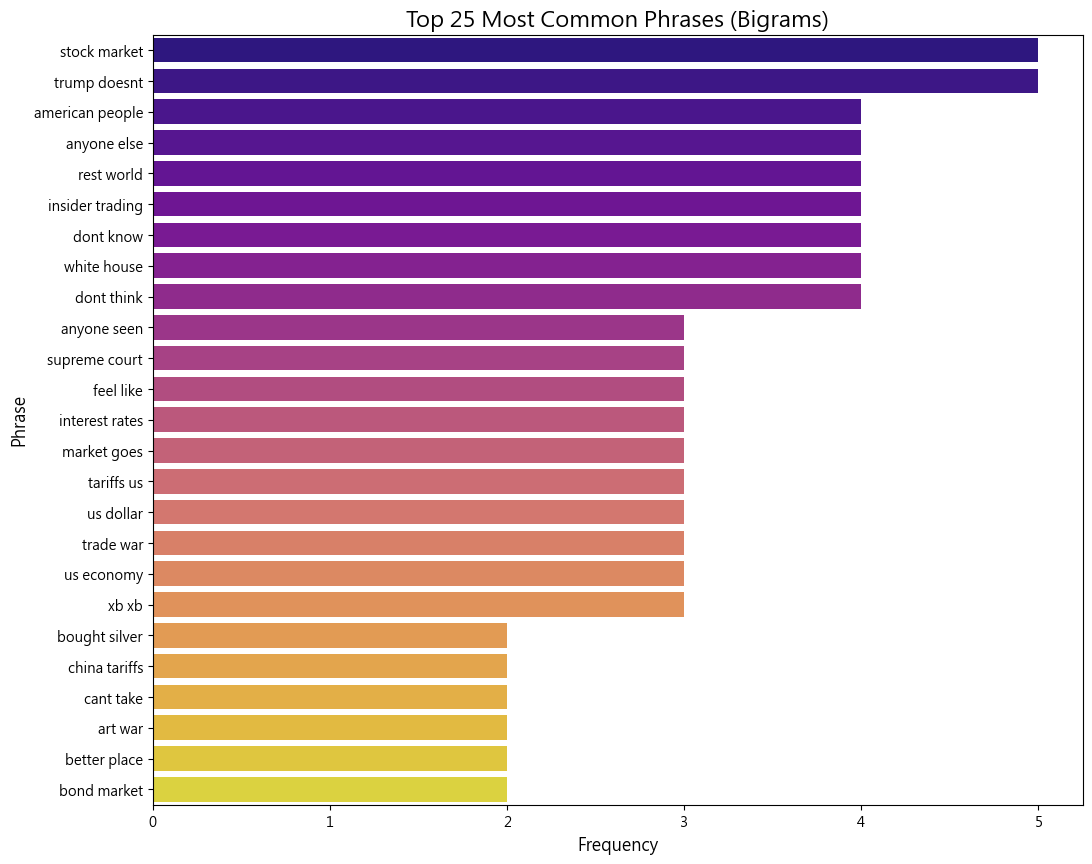

--------------------------------------------------


In [28]:
print("Additional Visualization: Analyzing the most common consecutive word pairs (Bigrams)...")

# Create a new CountVectorizer specifically for finding Bigrams
# ngram_range=(2, 2) means we are only looking for phrases made of two words
bigram_vectorizer = CountVectorizer(
    stop_words=list(STOPWORDS),
    ngram_range=(2, 2),
    min_df=2  # Also set a minimum document frequency to filter out rare phrases
)

# Fit the data and transform it
X_bigrams = bigram_vectorizer.fit_transform(df['cleaned_text'])
bigram_terms = bigram_vectorizer.get_feature_names_out()

# Calculate the total frequency of each Bigram
bigram_frequencies = np.asarray(X_bigrams.sum(axis=0)).flatten()
bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'frequency': bigram_frequencies})

# Sort and select the most common Top 25 phrases
sorted_bigram_df = bigram_freq_df.sort_values(by='frequency', ascending=False)
top_25_bigrams = sorted_bigram_df.head(25)

# Plot a horizontal bar chart (Horizontal Bar Plot)
# A horizontal bar chart is better for displaying long phrase labels
plt.figure(figsize=(12, 10))
sns.barplot(x='frequency', y='bigram', data=top_25_bigrams,
            palette='plasma', orient='h', hue='bigram', legend=False)
plt.title('Top 25 Most Common Phrases (Bigrams)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Phrase', fontsize=12)
plt.show()
print("-" * 50)

### Chart 2 : Term Co-occurrence Network
The purpose of this graph is to visualize the relationships between terms within a text.

Nodes: Each point in the graph represents a term.

Edges: A line connecting two nodes indicates that the two terms frequently appear together in the same document (or sentence).

In simple terms, we can observe the following from the graph:

Relationship Strength: The thickness of the lines or the proximity of the nodes usually represents the strength of the relationship. Thicker lines or closer nodes indicate they are mentioned together more often.

Thematic Clusters: The naturally formed clusters in the graph often represent a specific underlying theme or concept within the text data.

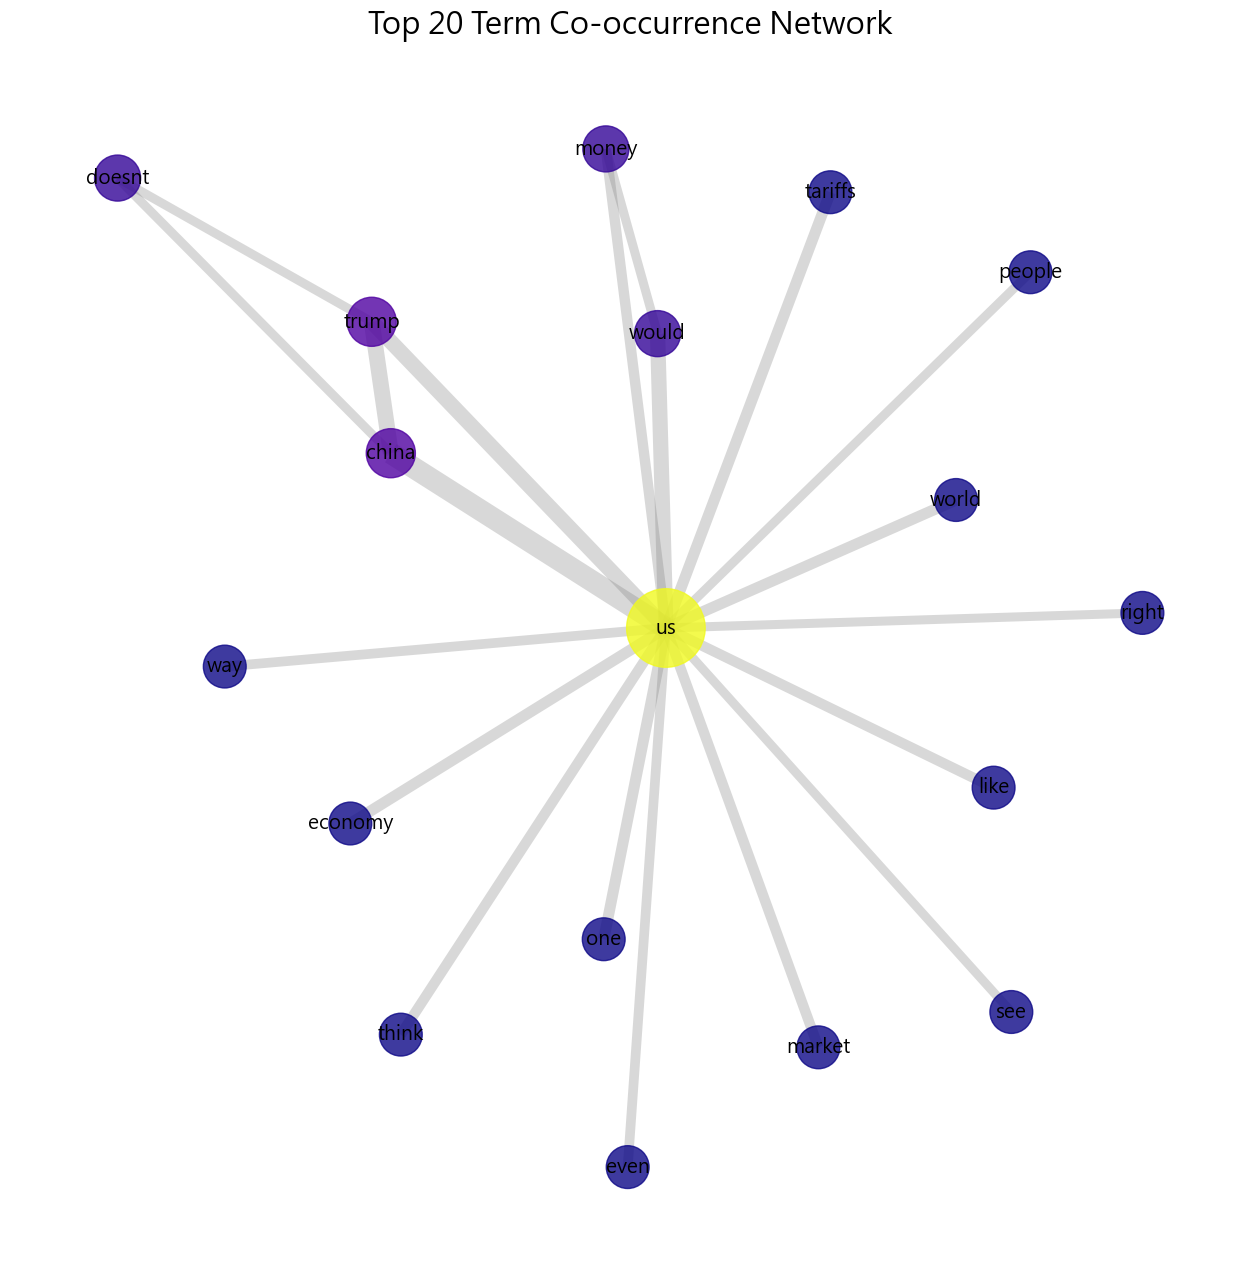

In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

coo_matrix = co_occurrence_matrix.tocoo()

edges = []
for i, j, w in zip(coo_matrix.row, coo_matrix.col, coo_matrix.data):
    if i < j: 
        edges.append((i, j, w))

edges.sort(key=lambda x: x[2], reverse=True)
top_edges = edges[:20]  # <-- The only change needed is here!

G = nx.Graph()

nodes_in_top_edges = set()
for i, j, w in top_edges:
    nodes_in_top_edges.add(terms[i])
    nodes_in_top_edges.add(terms[j])
G.add_nodes_from(nodes_in_top_edges)

for i, j, w in top_edges:
    G.add_edge(terms[i], terms[j], weight=w)

plt.figure(figsize=(16, 16)) 

pos = nx.spring_layout(G, k=1.2, iterations=50, seed=42)

node_degrees = dict(G.degree())
node_sizes = [v * 150 + 800 for v in node_degrees.values()] # Made nodes a bit larger
node_colors = [v for v in node_degrees.values()]

edge_widths = [G[u][v]['weight'] / 2 for u, v in G.edges()]

nodes = nx.draw_networkx_nodes(G, pos, 
                               node_size=node_sizes, 
                               node_color=node_colors, 
                               cmap=plt.cm.plasma,
                               alpha=0.8)

nx.draw_networkx_edges(G, pos, 
                       width=edge_widths, 
                       alpha=0.3, 
                       edge_color='gray')

nx.draw_networkx_labels(G, pos, 
                       font_size=14, # Slightly larger font
                       font_family='sans-serif',
                       font_color='black')

plt.title('Top 20 Term Co-occurrence Network', fontsize=22)
plt.axis('off')
plt.show()

### Chart 3: Sentiment N-gram Heatmap
This heatmap is designed to analyze and visualize the frequency distribution of the most common multi-word phrases (specifically, two-word phrases or "bigrams") across different sentiment categories.

How to Interpret This Chart:

Rows (Y-axis): Each row represents one of the most frequent bigrams found in the entire text dataset.

Columns (X-axis): Each column corresponds to a specific sentiment category, such as 'Positive', 'Neutral', or 'Negative'.

Cells and Color Intensity: The number within each cell shows the total count of a specific bigram (its row) within a given sentiment category (its column). The color of the cell visually represents this number; a brighter or "hotter" color (like yellow) indicates a high frequency, while a darker or "cooler" color (like dark blue/purple) signifies a low frequency.

Analytical Goal:

The primary objective of this visualization is to identify which phrases are strong indicators of a particular sentiment. By looking for the brightest cells, we can quickly discover the key expressions and terminology that are most characteristic of positive, neutral, or negative feedback in the data.

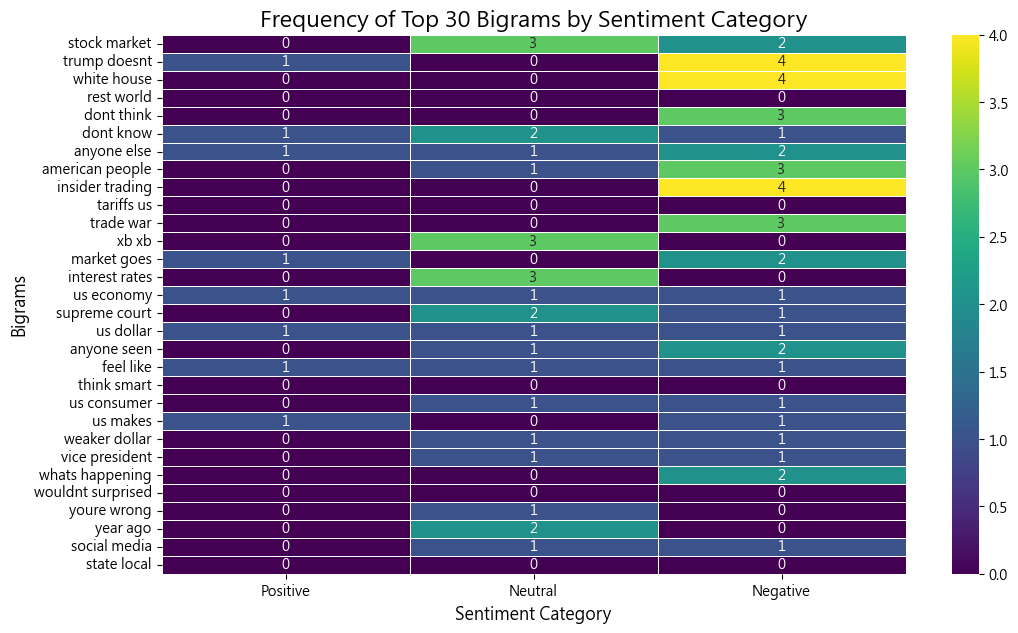

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns

# --- Find the Top 30 Bigrams across the entire dataset ---
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=list(STOPWORDS), min_df=2)
X_bigrams_all = bigram_vectorizer.fit_transform(df['cleaned_text'])
total_bigram_counts = np.asarray(X_bigrams_all.sum(axis=0)).flatten()
top_bigram_indices = total_bigram_counts.argsort()[-30:][::-1] # Get indices of top 30
top_bigrams = np.array(bigram_vectorizer.get_feature_names_out())[top_bigram_indices]

# --- Calculate Frequencies for each Sentiment Category ---
sentiments = ['Positive', 'Neutral', 'Negative']
heatmap_data = []

for sentiment in sentiments:
    # Filter text for the current sentiment
    sentiment_text = df[df['category_name'] == sentiment]['cleaned_text']
    
    # Use the pre-defined top bigrams as the vocabulary
    sentiment_vectorizer = CountVectorizer(ngram_range=(2, 2), vocabulary=top_bigrams)
    X_sentiment = sentiment_vectorizer.fit_transform(sentiment_text)
    
    # Sum the counts for this sentiment and add to our data list
    sentiment_counts = np.asarray(X_sentiment.sum(axis=0)).flatten()
    heatmap_data.append(sentiment_counts)

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(data=np.array(heatmap_data).T, index=top_bigrams, columns=sentiments)

# --- Visualization ---
plt.figure(figsize=(12, 7))

sns.heatmap(
    heatmap_df,
    annot=True,     # Show the frequency numbers in the cells
    fmt="d",        # Format numbers as integers
    cmap="viridis", # Choose a color map
    linewidths=.5
)

plt.title('Frequency of Top 30 Bigrams by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Bigrams', fontsize=12)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here